In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import exposure
from nilearn import plotting
%matplotlib inline
import csv
import torch
import gzip

In [4]:
path = '../data/ribfrac-challenge/training/prepared/pos/RibFrac100_127.pt.gz'
(img, label) = torch.load(gzip.GzipFile(path, "rb"))


In [5]:
print((label.numpy() != 1).sum())


155


In [31]:
train_info_path = "../data/ribfrac-challenge/training/ribfrac-train-info-all.csv"

label_map = {}
with open(train_info_path, newline="") as f:
    reader = csv.DictReader(f, delimiter=",")
    for row in reader:
        public_id = row["public_id"]
        label_id = int(row["label_id"])
        code = int(row["label_code"])

        if public_id not in label_map:
            label_map[public_id] = {}

        label_map[public_id][label_id] = code

In [32]:
public_id = 'RibFrac43'

In [33]:
labels = nib.load(f'../data/ribfrac-challenge/training/labels/all/{public_id}-label.nii.gz').get_fdata()
labels = torch.tensor(labels)
labels = labels.apply_(label_map[public_id].get).numpy()

In [34]:
img = nib.load(f'../data/ribfrac-challenge/training/images/all/{public_id}-image.nii.gz').get_fdata()

In [35]:
prediction = np.load(f'../inference-results/{public_id}-image-prediction.npy')

In [36]:
bin_probs = np.load(f'../inference-results/{public_id}-image-bin-probs.npy')

In [37]:
probs = np.load(f'../inference-results/{public_id}-image-probs.npy')

In [8]:
print("label image shape:", prediction.shape)

label image shape: (512, 512, 325)


In [38]:
print(labels.min())
print(labels.max())


-1.0
4.0


In [39]:
img.shape

(512, 512, 341)

(array([46489.,     0.,     0.,     0., 61844.,     0., 11965.,     0.,
            0., 59209.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

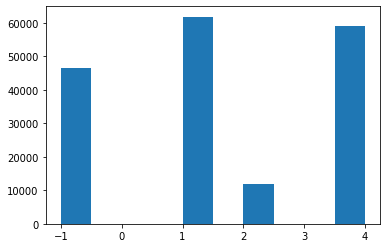

In [40]:
plt.hist(labels[labels != 0].flatten())

(array([    0.,     0.,     0.,     0.,     0., 14022.,     0.,     0.,
            0.,     0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

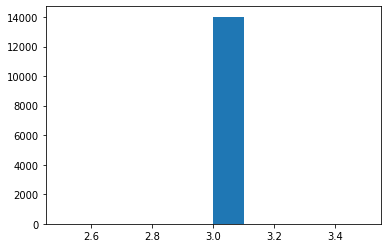

In [41]:
plt.hist(prediction[prediction != 1].flatten())

(array([4.4694640e+08, 3.4470000e+03, 2.2580000e+03, 1.7860000e+03,
        1.6300000e+03, 1.6290000e+03, 1.7870000e+03, 2.2570000e+03,
        3.4470000e+03, 8.9381983e+07]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

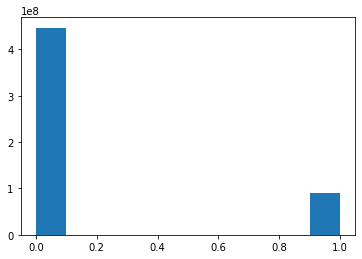

In [42]:
plt.hist(probs.flatten())

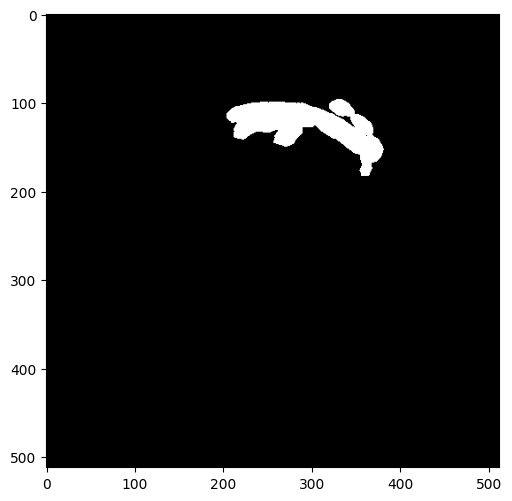

In [18]:
plt.figure(figsize = (6,6), dpi=100) 
labels_plt = np.max(labels > 0, axis=-1)
plt.imshow(labels_plt, cmap=plt.cm.gray) 


(512, 512, 325)
(512, 512)


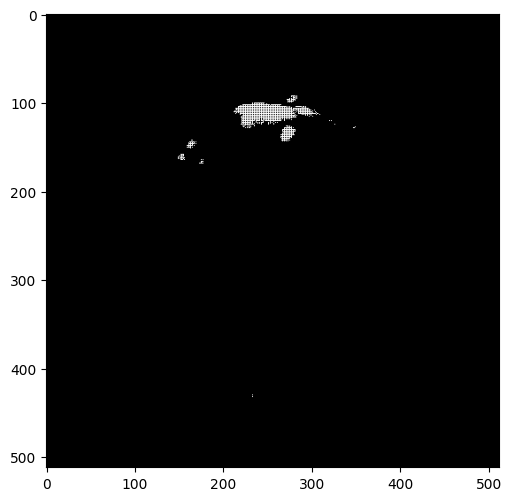

In [21]:
plt.figure(figsize = (6,6), dpi=100) 
print(prediction.shape)
combined_slices = np.max(prediction > 1, axis=-1)
print(combined_slices.shape)
plt.imshow(combined_slices, cmap=plt.cm.gray) 

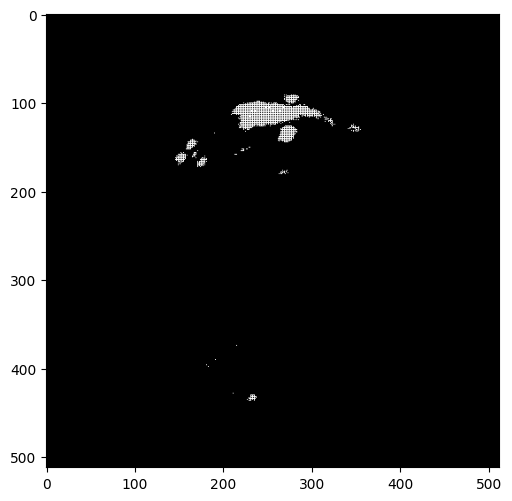

In [27]:
# plot probs
plt.figure(figsize = (6,6), dpi=100) 
combined_slices = np.max(probs > 0.01, axis=-1)
plt.imshow(combined_slices, cmap=plt.cm.gray) 

In [16]:
print(probs[0, 0])

[2.2649765e-05 2.4437904e-05 2.8014183e-05 3.0398369e-05 2.7596951e-05
 2.3126602e-05 2.1934509e-05 2.2649765e-05 2.2292137e-05 2.2053719e-05
 2.2530556e-05 2.5570393e-05 2.7358532e-05 2.8192997e-05 3.0100346e-05
 3.1232834e-05 2.9921532e-05 2.8908253e-05 2.8252602e-05 2.8729439e-05
 2.9861927e-05 2.9861927e-05 2.9921532e-05 2.8610229e-05 2.5272369e-05
 2.3066998e-05 2.3365021e-05 2.4318695e-05 2.5153160e-05 2.5987625e-05
 2.4437904e-05 2.3603439e-05 2.3484230e-05 2.2411346e-05 2.1994114e-05
 2.2649765e-05 2.3782253e-05 2.4795532e-05 2.3901463e-05 2.3365021e-05
 2.3603439e-05 2.3603439e-05 2.4437904e-05 2.6226044e-05 2.9087067e-05
 3.3497810e-05 3.5762787e-05 3.7312508e-05 3.4928322e-05 3.1948090e-05
 2.8729439e-05 2.6702881e-05 2.7060509e-05 2.7954578e-05 3.0040741e-05
 3.3497810e-05 3.4809113e-05 3.5822392e-05 3.4868717e-05 3.3259392e-05
 3.3199787e-05 3.3736229e-05 3.2186508e-05 3.1709671e-05 3.1113625e-05
 3.1709671e-05 3.2305717e-05 3.3497810e-05 3.4511089e-05 3.6656857e-05
 3.850

(512, 512, 325)


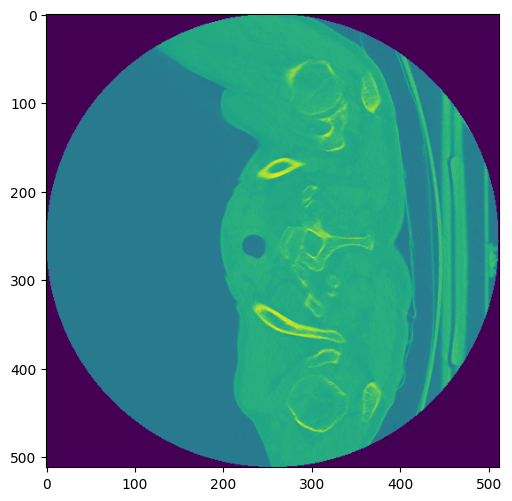

In [17]:
plt.figure(figsize = (6,6), dpi=100) 
plt.imshow(img[:, :, 300]) 
print(img.shape)